#  Real Estate Value Prediction for Different Locations

In this project, we dive into the real estate landscape by analyzing price trends across different zip codes, utilizing data sourced from Zillow Research.

Acting as consultants for MDN real estate investment firm, our objective is to identify the best locations for their investments. Our analysis will explore the potential correlation with size rank and value of property as an indicator, helping us find the top 10 counties deemed most promising for investment, while also flagging the bottom 10 that warrant caution.

In [2]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#from google.colab import files

#uploaded = files.upload()

In [3]:
#Import data
data = pd.read_csv('zillow_data.csv')
data

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [5]:
print(f"Column names: {data.columns}")

Column names: Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)


In [6]:
data['SizeRank'].value_counts()

2047     1
661      1
12947    1
8849     1
10896    1
        ..
3387     1
1338     1
7481     1
5432     1
2049     1
Name: SizeRank, Length: 14723, dtype: int64

In [7]:
data['CountyName'].value_counts()

Los Angeles    264
Jefferson      175
Orange         166
Washington     164
Montgomery     159
              ... 
Tunica           1
Nantucket        1
Pasquotank       1
Camp             1
Russell          1
Name: CountyName, Length: 1212, dtype: int64

In [8]:
data.nunique()

RegionID      14723
RegionName    14723
City           7554
State            51
Metro           701
              ...  
2017-12        5248
2018-01        5276
2018-02        5303
2018-03        5332
2018-04        5310
Length: 272, dtype: int64

In [9]:
# Here we checked the distribution of null values among the study variables
data.isnull().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

# Data Cleaning

In [10]:
#Convert the columns into rows
data_new = pd.melt(data, id_vars=data.columns[:7],
                  value_vars=data.columns[7:241],
                  var_name="date",
                  value_name="value_of_property")

In [11]:
data_new

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,date,value_of_property
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,77300.0
...,...,...,...,...,...,...,...,...,...
3445177,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,2015-09,191900.0
3445178,59107,3293,Woodstock,NH,Claremont,Grafton,14720,2015-09,189500.0
3445179,75672,40404,Berea,KY,Richmond,Madison,14721,2015-09,107800.0
3445180,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,2015-09,539000.0


In [38]:
Data_new2 = data_new.copy()

In [39]:
#Splitting year and month 
Data_new2[["year","month"]] = Data_new2["date"].str.split(pat="-", n=-1, expand=True).copy()

# change datatype of year to datetime
Data_new2['year'] = pd.to_datetime(Data_new2['year'])

In [40]:
Data_new2

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,date,value_of_property,year,month
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04,334200.0,1996-01-01,04
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04,235700.0,1996-01-01,04
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04,210400.0,1996-01-01,04
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,498100.0,1996-01-01,04
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,77300.0,1996-01-01,04
...,...,...,...,...,...,...,...,...,...,...,...
3445177,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,2015-09,191900.0,2015-01-01,09
3445178,59107,3293,Woodstock,NH,Claremont,Grafton,14720,2015-09,189500.0,2015-01-01,09
3445179,75672,40404,Berea,KY,Richmond,Madison,14721,2015-09,107800.0,2015-01-01,09
3445180,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,2015-09,539000.0,2015-01-01,09


In [ ]:
# Here checked on Quality - We looked at the missingness by the City variable based on the value of property column

missing_percentage_by_Region = data_new.groupby('RegionName')['value_of_property'].apply(lambda x: x.isnull().mean() * 100)

# Then sorted
sorted_missing_percentage = missing_percentage_by_Region.sort_values(ascending=False)


top_region_missing_data = sorted_missing_percentage.head(10)
print(top_region_missing_data)


In [ ]:
# I did a count of all cities and the percentage of missingness
Regions_with_more_than_1_percent_missing = (missing_percentage_by_Region > 90).sum()

Total_Region = data_new['RegionName'].nunique()

null_values_in_Region = data_new['RegionName'].isnull().sum()

print(f"Number of Region with more than 1% missing values: {Regions_with_more_than_1_percent_missing}")
print(f"Total number of Regions in our data:{Total_Region}")
print(f"Total null values in the Region Field:{null_values_in_Region}")

In [ ]:
# Here we replaced missing value in value of property by their mean based on the Metro column.

data_new['value_of_property'] = data_new['value_of_property'].fillna(data_new.groupby('RegionName')['value_of_property'].transform('mean'))


In [ ]:
# Confirmed whether we dropped and replaced the null values by the mean
data_new.isnull().sum()

In [ ]:
# descriptive statistics on vlue of property
data_new['value_of_property'].describe()

In [ ]:
df_zip1 = data_new[(data_new["RegionName"] == 10021) & (data_new["State"] == "NY")]



In [ ]:
df_zip1f = data_new[(data_new["RegionName"] == 10021)]


In [ ]:
df_zip1 = data_new[(data_new["RegionName"] == 81611)]

In [1]:

df_len = len(df_zip1)
df_len

NameError: name 'df_zip1' is not defined

In [ ]:
len_d = len(data_new)
len_d

In [ ]:
data_new.nunique()

In [ ]:
# Convert date to a datetime column
data_new['date'] = pd.to_datetime(data_new['date'])

In [ ]:
data_new.info()

# EDA

In [ ]:
# Top 10 states with highest mean value of property
data_top_10_states=data_new.groupby('State').aggregate({'value_of_property':'mean'})["value_of_property"].nlargest(10)
data_top_10_states

In [ ]:
data_top_10_states.plot.bar()
plt.title("Top 10 states with highest average value of property")

In [ ]:
# top 10 zip codes (Region Name) in terms of property value
data_top_10_zipcodes=data_new.groupby(['State','RegionName']).aggregate({'value_of_property':'mean'})["value_of_property"].nlargest(10)
data_top_10_zipcodes

In [ ]:
data_top_10_zipcodes.plot.bar()
plt.title("Top 10 Zip codes with highest average value of property")

In [ ]:
# group all data (for all zipcodes/states) in a time series
data_all_grouped_by_date = data_new.groupby('date').aggregate({'value_of_property':'mean'})
data_all_grouped_by_date

In [ ]:
# time series line plot  - for all the data
data_all_grouped_by_date.plot(figsize = (16,6));

In [ ]:
# time series histogram  - for all the data
data_all_grouped_by_date.hist();

In [ ]:
# time series density plot  - for all the data
data_all_grouped_by_date.plot(kind='kde');

In [ ]:
# ??Conclusion of above plots???

In [ ]:
df_zip1f.head()

In [ ]:
#drop irrelevant columns
df_zip1f_grouped_by_date = df_zip1f.groupby('date').aggregate({'value_of_property': 'mean'})
df_zip1f_grouped_by_date

In [14]:
df_zip1f_grouped_by_date.plot(figsize=(12,6), linewidth=2, fontsize=10);

NameError: name 'df_zip1f_grouped_by_date' is not defined

## Model Preparation

In [34]:
#How we spread risk?
# by picking the top zipcode in NY and the other top zipcodes from the top 4 states 

In [ ]:
#Drop the null values from 1996 - 2003

In [46]:
# Define a function that selects a state and display missing values

def missingValues(x):
    State = Data_new2[(Data_new2["RegionName"] == x)]

    # drop the month column
    #NewYork.drop(["date","month"],axis=1,inplace=True)

    #create a variable that checks which years contain the null values
    missing_values = State[State['value_of_property'].isnull()]
    #print(missing_values)

    #missing values by year
    missing_values_by_year = missing_values.groupby('year').size()
    print(missing_values_by_year)

    #aggregate the values
    State_grouped_by_date = State.groupby('year').aggregate({'value_of_property': 'mean'})
    #print(State_grouped_by_date)

    # Plot the time series
    State_grouped_by_date.plot(figsize=(12,6), linewidth=2, fontsize=10);

    

year
1996-01-01     9
1997-01-01    12
1998-01-01    12
1999-01-01    12
2000-01-01    12
2001-01-01    12
2002-01-01    12
2003-01-01    12
dtype: int64


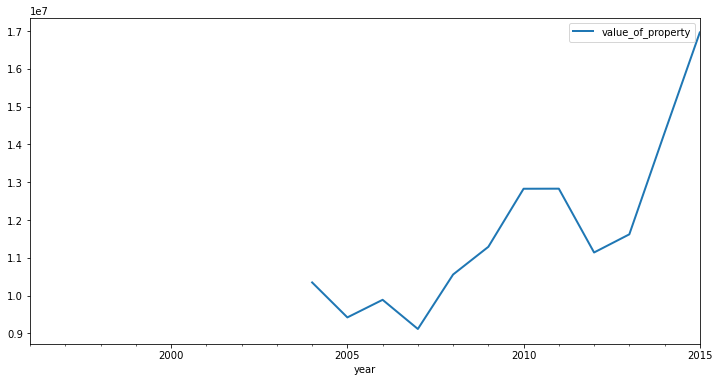

In [49]:
#NewYork missing values
NY_zip1 = missingValues(10021)
NY_zip1

Series([], dtype: int64)


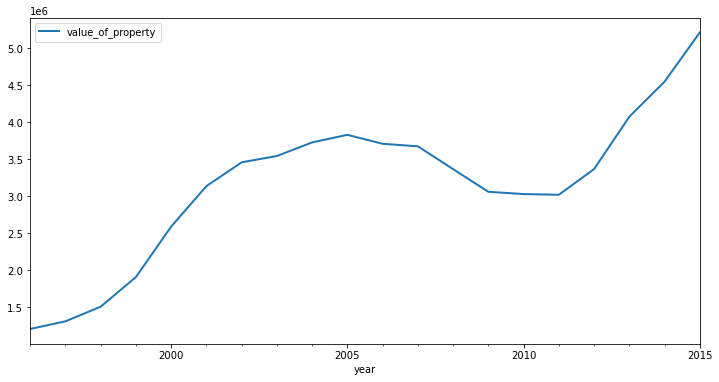

In [51]:
#California 
CA_zip1=  missingValues(94027)
CA_zip1

Series([], dtype: int64)


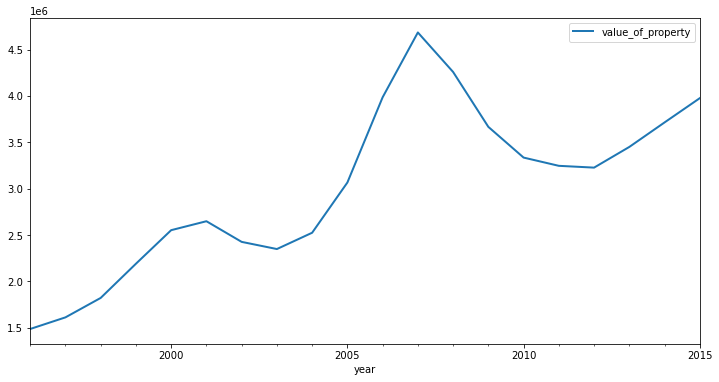

In [52]:
# CO
CO_zip1 = missingValues(81611)
CO_zip1

Series([], dtype: int64)


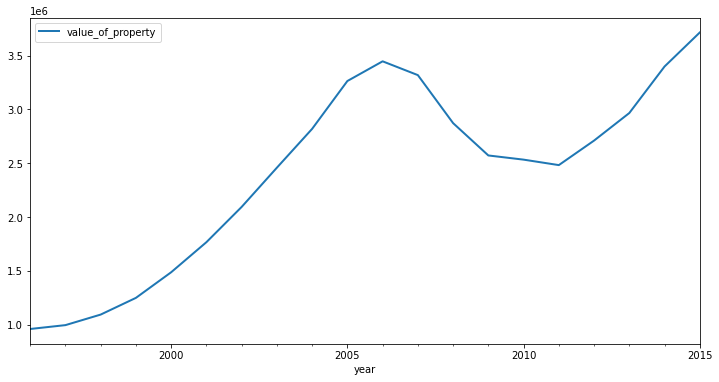

In [54]:
#Florida
FL_zip1 = missingValues(33480)
FL_zip1

year
1996-01-01     9
1997-01-01    12
1998-01-01    12
1999-01-01    12
2000-01-01    12
2001-01-01    12
2002-01-01    12
2003-01-01    12
2004-01-01    12
2005-01-01     6
dtype: int64


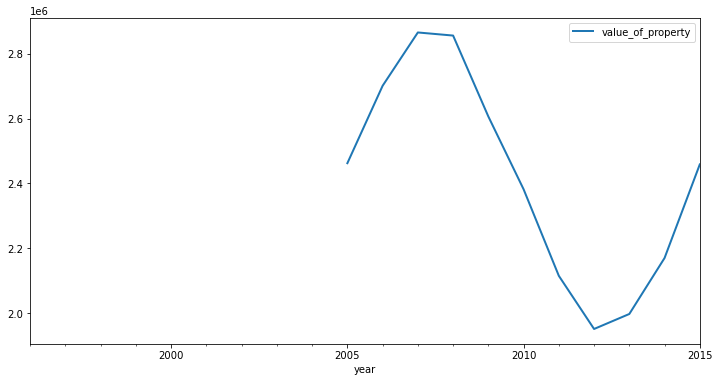

In [55]:
#GA
GA_zip1 = missingValues(31561)
GA_zip1

In [ ]:
#Drop the first years
#Stationarity
